<a href="https://colab.research.google.com/github/amyben01/TxGNN/blob/main/outputTxgnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sns.set_theme()
#load dataset
file_path = '/content/drive/MyDrive/result_indication.csv'
df = pd.read_csv(file_path)

Plotting of each first n durgs for each disease

In [ ]:
#drug frequency
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

# Load data
df = pd.read_csv('/content/drive/MyDrive/result_indication.csv')

# Convert RankedList string to list
df['Ranked List'] = df['Ranked List'].apply(ast.literal_eval)

# Top-N
N = 5
rows = []
for _, row in df.iterrows():
    drugs = row['Ranked List'][:N]
    for rank, drug in enumerate(drugs, start=1):
        rows.append({'Drug': drug, 'Rank': rank})

top_n_df = pd.DataFrame(rows)


/tmp/ipython-input-31-3916533569.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




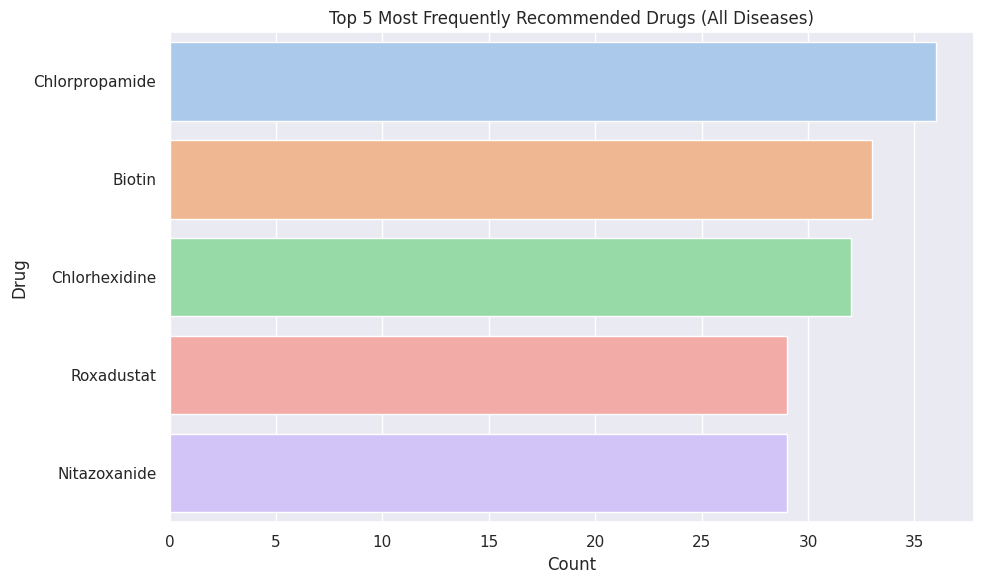

In [ ]:
plt.figure(figsize=(10, 6))
plot = sns.countplot(
    data=top_n_df,
    y='Drug',
    order=top_n_df['Drug'].value_counts().head(5).index,
    palette='pastel'
)

plt.title(f"Top {N} Most Frequently Recommended Drugs (All Diseases)")
plt.xlabel("Count")
plt.ylabel("Drug")
plt.tight_layout()
plt.show()


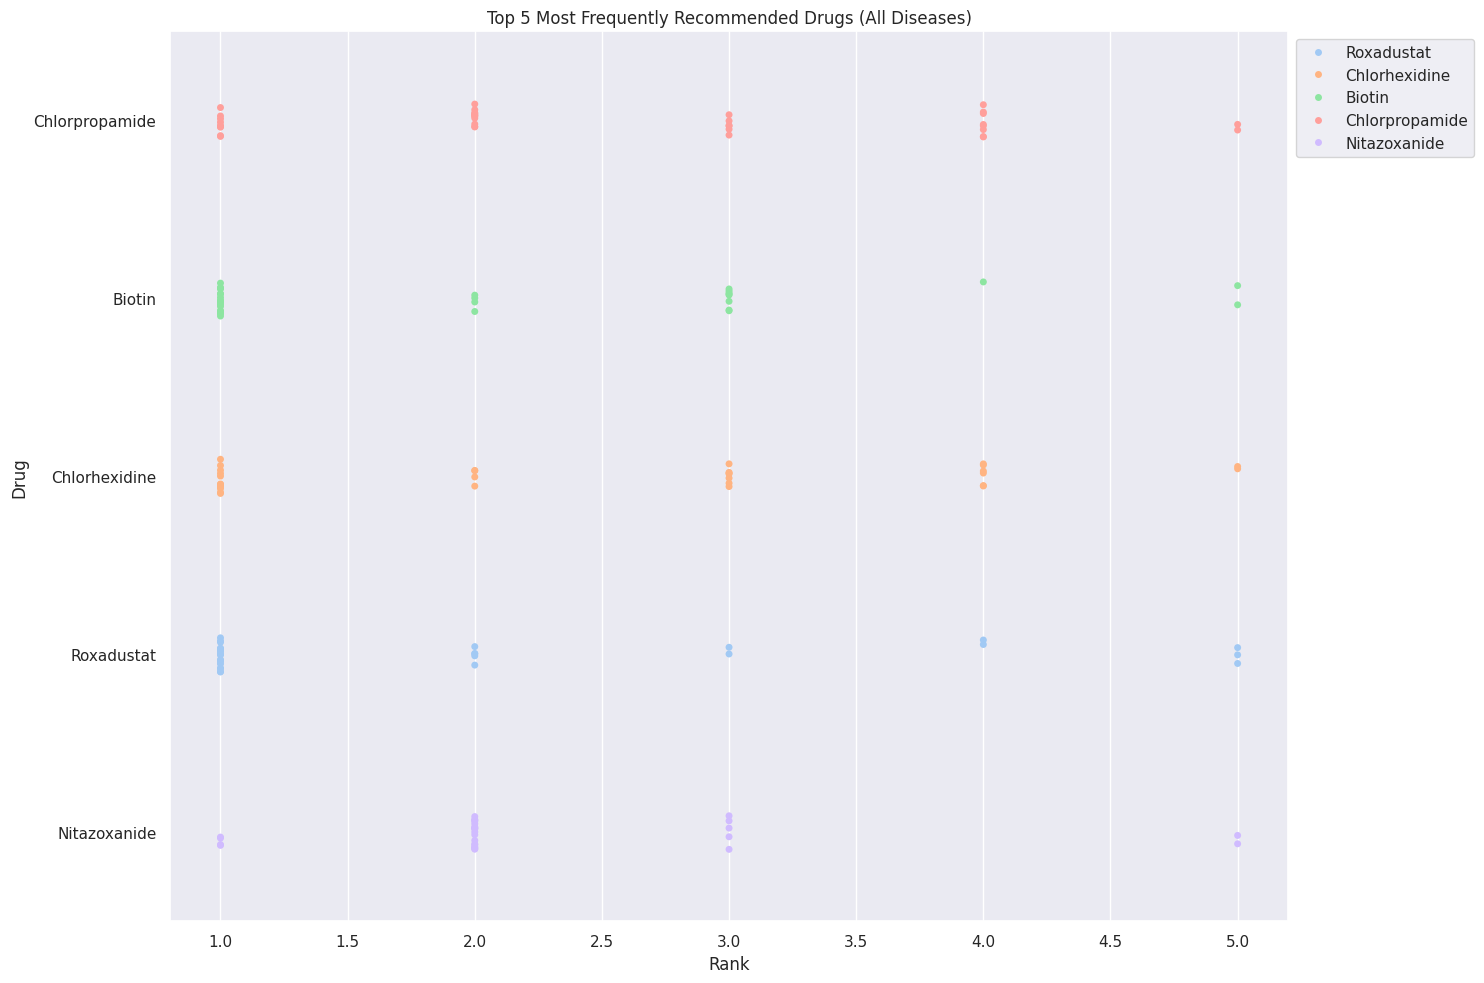

In [ ]:
top5_drugs = top_n_df['Drug'].value_counts().head(5).index
filtered_df = top_n_df[top_n_df['Drug'].isin(top5_drugs)]

plt.figure(figsize=(15, 10))
sns.stripplot(
    data=filtered_df,
    y='Drug',
    x='Rank',
    order=top5_drugs,
    palette='pastel',
    jitter=True,
    hue='Drug',
    legend=True
)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.title(f"Top {N} Most Frequently Recommended Drugs (All Diseases)")
plt.xlabel("Rank")
plt.ylabel("Drug")
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px
import pandas as pd




# Step 1: Filter to top 5 drugs
top5_drugs = top_n_df['Drug'].value_counts().head(5).index
filtered_df = top_n_df[top_n_df['Drug'].isin(top5_drugs)].copy()

# Step 2: Count how many points per (Drug, Rank)
group_counts = filtered_df.groupby(['Drug', 'Rank']).size().reset_index(name='Count')

# Step 3: Merge the count back to every point so all duplicates get same count info
filtered_df = filtered_df.merge(group_counts, on=['Drug', 'Rank'], how='left')

# Step 4: Plot all points individually, but show count in hover
fig = px.strip(
    filtered_df,
    x='Rank',
    y='Drug',
    color='Drug',
    hover_data={'Drug': True, 'Rank': True, 'Count': True},
    title=f"Top {N} Most Frequently Recommended Drugs (Interactive Stripplot)"
)

fig.update_traces(jitter=1, marker=dict(size=7, opacity=0.5))
fig.update_layout(height=600, width=1000)
fig.show()


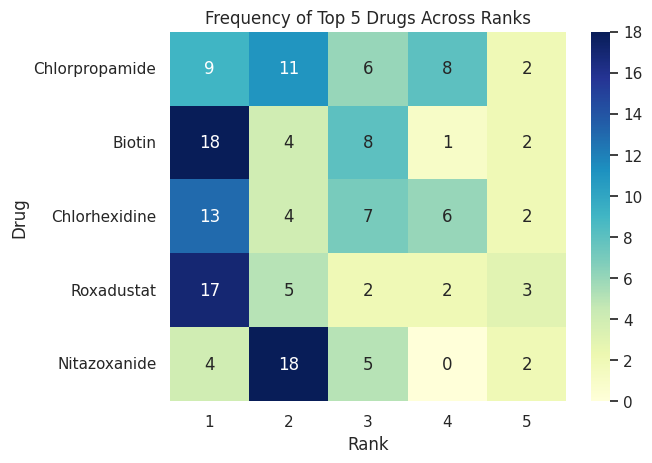

In [ ]:
heatmap_data = top_n_df.groupby(['Drug', 'Rank']).size().unstack(fill_value=0) #fill values with 0 if missing
#group data. by each comb of drug and rank and size() counts how many times each comb appears
top_drugs = top_n_df['Drug'].value_counts().head(5).index #make sure it is only the top 5 most frequent drugs
heatmap_data = heatmap_data.loc[top_drugs] #filter the heatmap to only get the most 5 frequent

sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu') #annot=True annote each cell with its actual count
plt.title("Frequency of Top 5 Drugs Across Ranks")
plt.xlabel("Rank")
plt.ylabel("Drug")
plt.show()


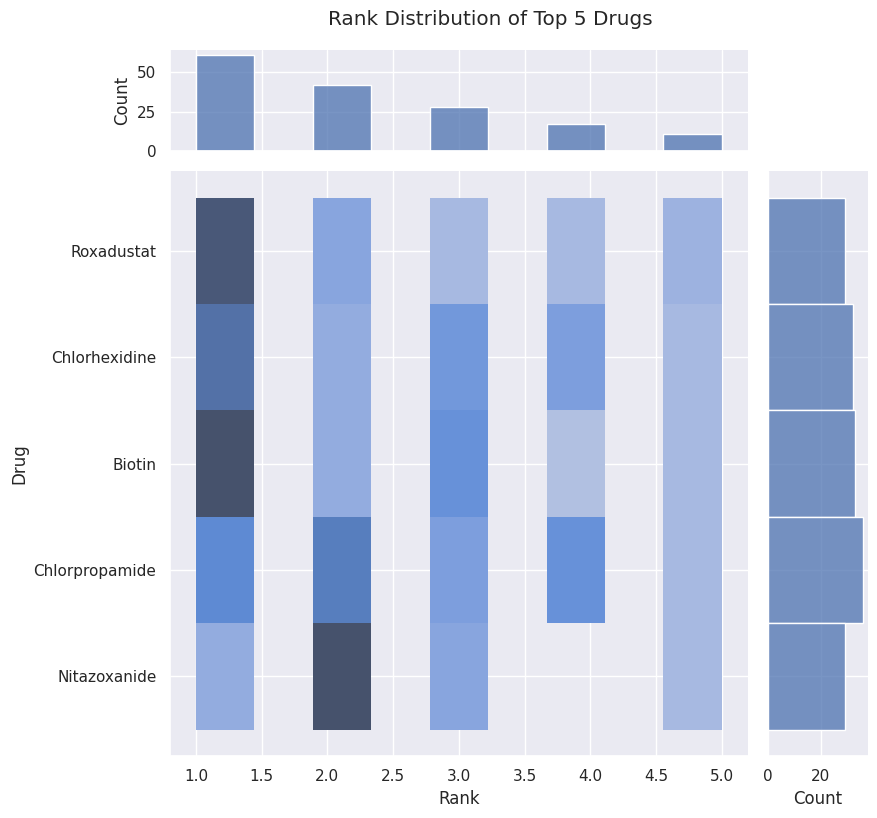

In [ ]:
# Only for top 5 most frequent drugs
top5_drugs = top_n_df['Drug'].value_counts().head(5).index
subset = top_n_df[top_n_df['Drug'].isin(top5_drugs)]

sns.set(style="darkgrid")

# Create a jointplot: Count vs Rank
sns.jointplot(
    data=subset,
    x='Rank',
    y='Drug',
    kind='hist',
    height=8,
    marginal_ticks=True,
    palette='bright',

).fig.suptitle("Rank Distribution of Top 5 Drugs", y=1.02)

plt.show()


In [ ]:
print(heatmap_data)

Rank             1   2  3  4  5
Drug                           
Chlorpropamide   9  11  6  8  2
Biotin          18   4  8  1  2
Chlorhexidine   13   4  7  6  2
Roxadustat      17   5  2  2  3
Nitazoxanide     4  18  5  0  2


In [ ]:
print(df.columns)

Index(['ID', 'Name', 'Ranked List', 'AUROC', 'AUPRC', 'Accuracy',
       'Sensitivity', 'Specificity', 'F1', 'PPV', 'NPV', 'FPR', 'FNR', 'FDR',
       '# of Pos', 'Prediction', 'Labels', 'Recall@1%', 'Recall_Random@1%',
       'Enrichment@1%', 'MRR@1%', 'AP@1%', 'Hits@1%', 'Missed@1%', 'Recall@5%',
       'Recall_Random@5%', 'Enrichment@5%', 'MRR@5%', 'AP@5%', 'Hits@5%',
       'Missed@5%', 'Recall@10%', 'Recall_Random@10%', 'Enrichment@10%',
       'MRR@10%', 'AP@10%', 'Hits@10%', 'Missed@10%', 'Recall@10',
       'Recall_Random@10', 'Enrichment@10', 'MRR@10', 'AP@10', 'Hits@10',
       'Missed@10', 'Recall@50', 'Recall_Random@50', 'Enrichment@50', 'MRR@50',
       'AP@50', 'Hits@50', 'Missed@50', 'Recall@100', 'Recall_Random@100',
       'Enrichment@100', 'MRR@100', 'AP@100', 'Hits@100', 'Missed@100'],
      dtype='object')


In [ ]:
#drug frequency
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

# Load data
df = pd.read_csv('/content/drive/MyDrive/result_indication.csv')

# Convert RankedList string to list
df['Ranked List'] = df['Ranked List'].apply(ast.literal_eval)

# Top-N
N = 10
rows = []
for _, row in df.iterrows():
    drugs = row['Ranked List'][:N]
    for rank, drug in enumerate(drugs, start=1):
        rows.append({'Drug': drug, 'Rank': rank})

top_n_df = pd.DataFrame(rows)


SAME THING AS BEFORE BUT WITH 10

/tmp/ipython-input-39-2438623059.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




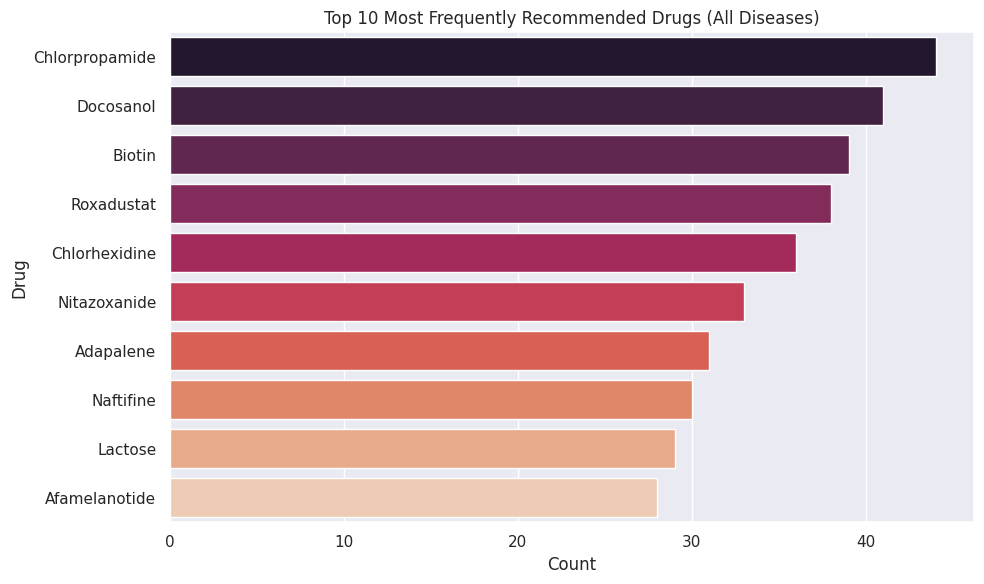

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=top_n_df, y='Drug', order=top_n_df['Drug'].value_counts().head(10).index, palette='rocket' )
plt.title(f"Top {N} Most Frequently Recommended Drugs (All Diseases)")
plt.xlabel("Count")
plt.ylabel("Drug")
plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objects as go
max_rank = 10

# Same thing as previous plot
rows_all = []
for _, row in df.iterrows():
    ranked_drugs = row['Ranked List'][:max_rank]
    for rank, drug in enumerate(ranked_drugs, start=1):
        rows_all.append({'Drug': drug, 'Rank': rank})

all_rank_df = pd.DataFrame(rows_all)

# Counts how often each drug appears in total (regardless of rank)
top_10_drugs = all_rank_df['Drug'].value_counts().head(10).index

# to simplify for analysis only work with 10 most frequent drugs
top_drugs_df = all_rank_df[all_rank_df['Drug'].isin(top_10_drugs)]

# Count how many times each drug appears at each rank
count_rank = top_drugs_df.groupby(['Drug', 'Rank']).size().reset_index(name='Count')

# Pivot to table format: rows=Drug, columns=Rank, values=Count
table_df = count_rank.pivot(index='Drug', columns='Rank', values='Count').fillna(0).astype(int)

# Sort drugs by total count descending
table_df['Total'] = table_df.sum(axis=1)
table_df = table_df.sort_values('Total', ascending=False).drop(columns='Total')

# Display as Plotly table
fig = go.Figure(data=[go.Table(
    header=dict(values=['Drug'] + [f'Rank {i}' for i in table_df.columns],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[table_df.index] + [table_df[col] for col in table_df.columns],
               fill_color='lavender',
               align='left'))
])

fig.update_layout(title='Counts of Top 10 Drugs by Rank')
fig.show()


In [ ]:
import plotly.express as px

fig = px.scatter(
    count_rank,
    x='Count',
    y='Rank',
    color='Drug',
    hover_data=['Drug', 'Rank', 'Count'],
    labels={'Count': 'Count of Appearances', 'Rank': 'Rank'},
    title='Rank Distribution of Top 10 Most Frequent Drugs',
    height=600
)

fig.update_yaxes(autorange="reversed")  # Rank 1 on top and rank 10 at the bottom to make it more visual
fig.show()


/tmp/ipython-input-42-1406224795.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




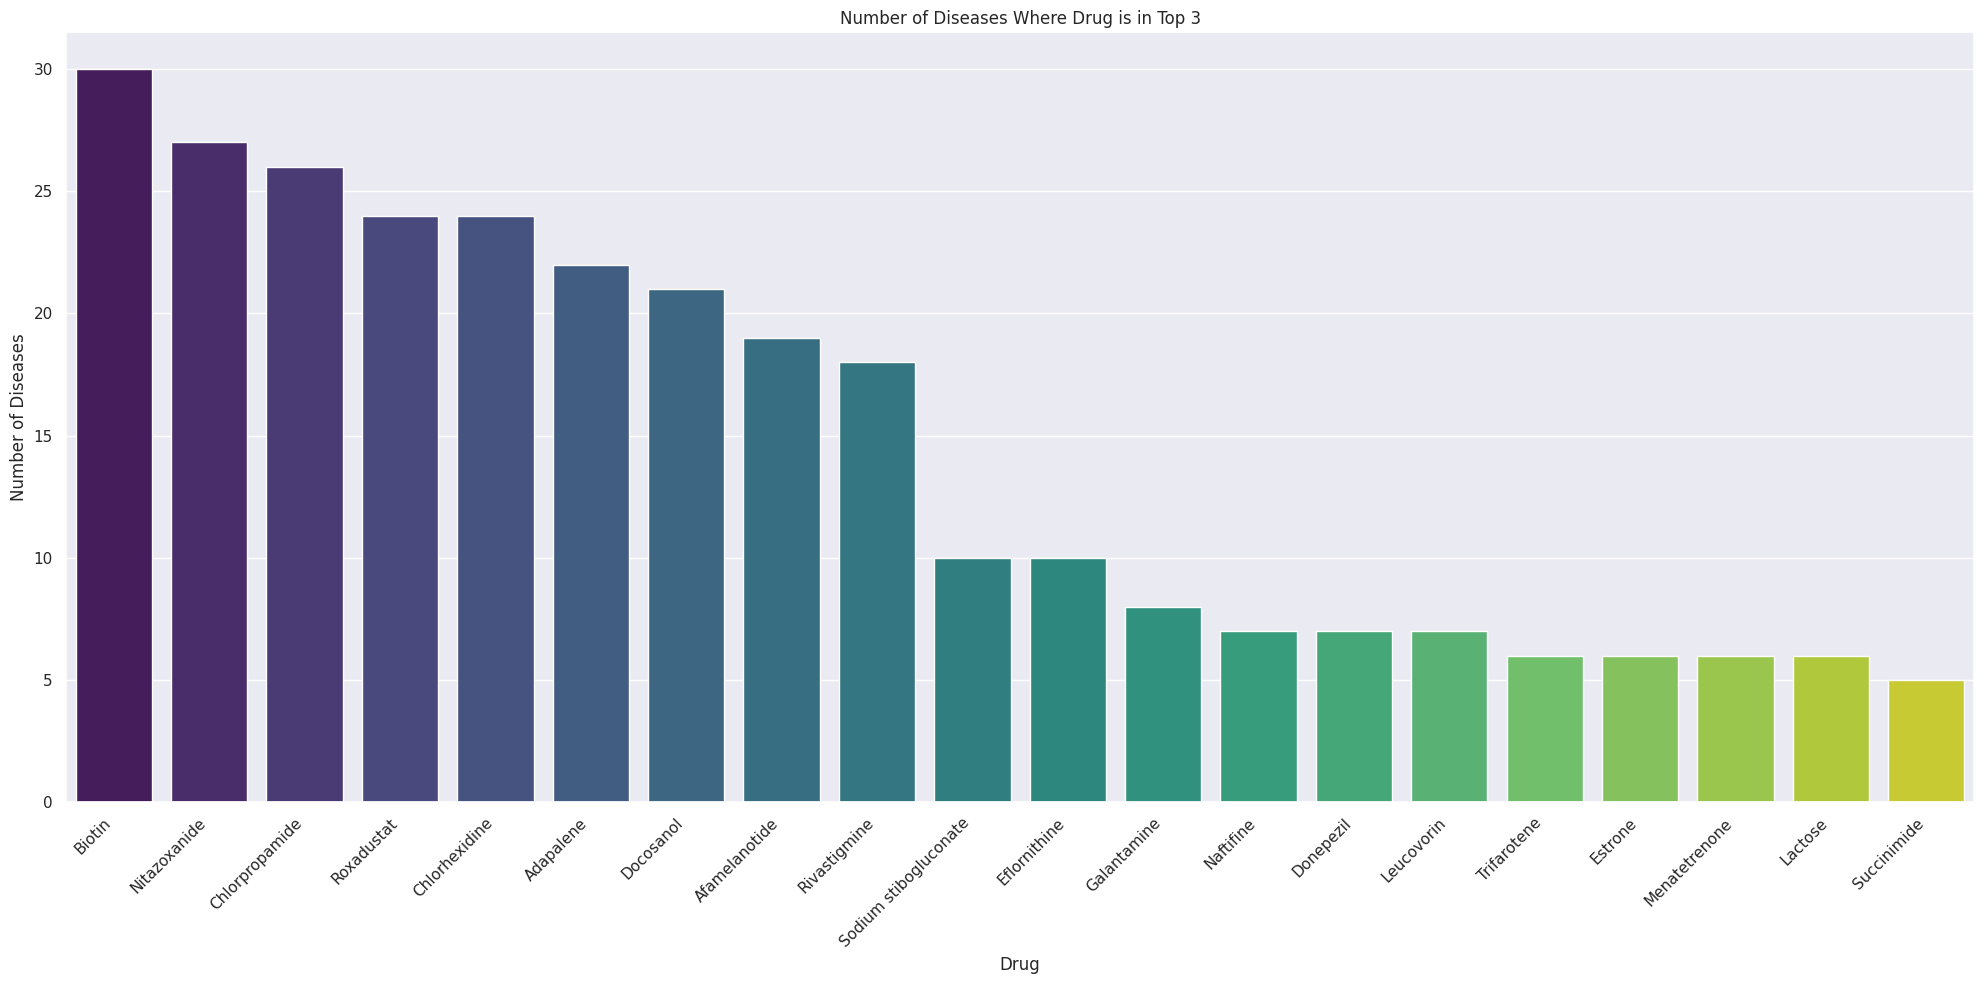

In [ ]:



max_rank = 3  # define "perform well" as top 3 ranks

rows = []
for _, row in df.iterrows():
    disease = row['Name']
    ranked_drugs = row['Ranked List'][:max_rank]

    for rank, drug in enumerate(ranked_drugs, start=1):
        rows.append({'Disease': disease, 'Drug': drug, 'Rank': rank})

# rank_df has columns: Disease, Drug, Rank
rank_df = pd.DataFrame(rows)


#In how many different diseases does each drug appear in the top 3?
drug_disease_counts = rank_df.groupby('Drug')['Disease'].nunique().reset_index()
drug_disease_counts = drug_disease_counts.rename(columns={'Disease': 'Num_Diseases_Top3'})

# Sort descending
drug_disease_counts = drug_disease_counts.sort_values('Num_Diseases_Top3', ascending=False)

# Plot the first 20 drugs
plt.figure(figsize=(20,10))
sns.barplot(data=drug_disease_counts.head(20), x='Drug', y='Num_Diseases_Top3', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title(f'Number of Diseases Where Drug is in Top {max_rank}')
plt.ylabel('Number of Diseases')
plt.xlabel('Drug')
plt.tight_layout()
plt.show()


In [ ]:
print(df['Ranked List'].head())
print(df['Ranked List'].apply(type).unique())


0    [Roxadustat, Afamelanotide, Sofalcone, Mecaser...
1    [Chlorhexidine, Docosanol, Adapalene, Naftifin...
2    [Trepibutone, Rivastigmine, Leucovorin, Nitisi...
3    [Rutin, L-Glutamine, Biotin, Rivastigmine, Eta...
4    [Chlorpropamide, Docosanol, Rivastigmine, Brem...
Name: Ranked List, dtype: object
[<class 'list'>]


Which drugs appear most often in diseases where AUROC is high (e.g., > 0.8)?

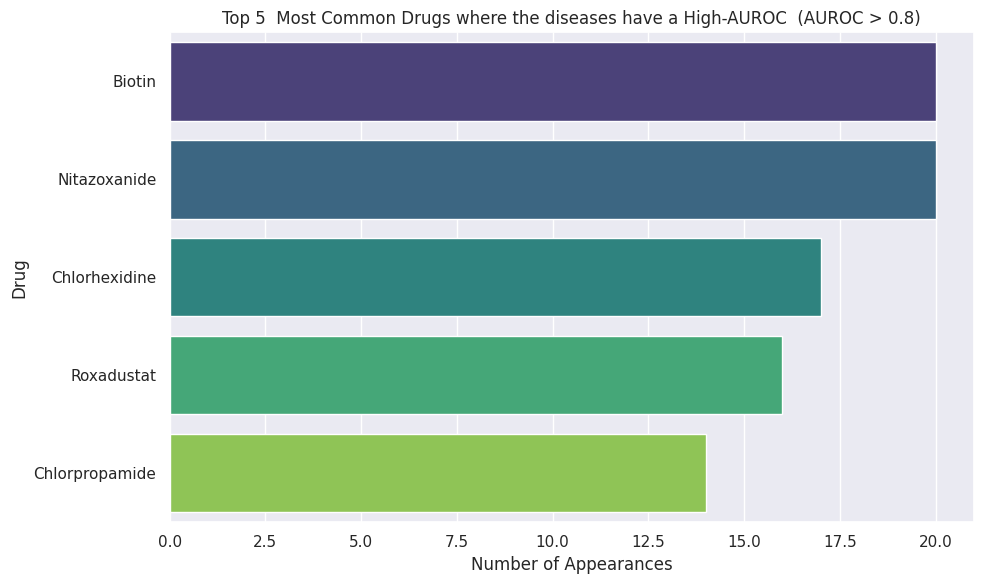

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Parameters
N = 5  # how many top drugs to consider
AUROC_THRESHOLD = 0.8

# Keeps only rows where the AUROC is above 0.8
high_auroc_df = df[df['AUROC'] > AUROC_THRESHOLD]

# Collect top-N drugs from each high-AUROC disease
top_drugs = None
top_drugs_high_auroc = []
for _, row in high_auroc_df.iterrows():
    top_drugs = row['Ranked List'][:N]
    top_drugs_high_auroc.extend(top_drugs)

# Count frequency of each drug
drug_counts = Counter(top_drugs_high_auroc)
drug_freq_df = pd.DataFrame(drug_counts.items(), columns=['Drug', 'Count']).sort_values(by='Count', ascending=False)

head_5 = drug_freq_df.head(5)
# Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=drug_freq_df.head(5), x='Count', y='Drug', palette='viridis', hue = head_5['Drug'] )
plt.title(f"Top {N}  Most Common Drugs where the diseases have a High-AUROC  (AUROC > {AUROC_THRESHOLD})")
plt.xlabel("Number of Appearances")
plt.ylabel("Drug")
plt.tight_layout()
plt.show()


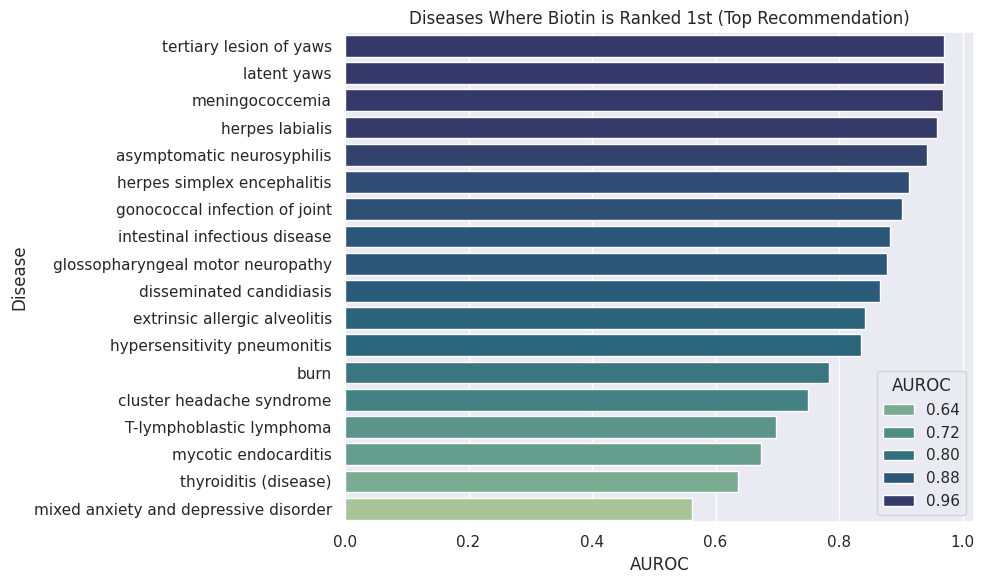

In [ ]:


# Filter rows to see the diseases where Biotin is ranked 1st
biotin_first_df = df[df['Ranked List'].apply(lambda x: x[0] == 'Biotin')]

# Plot AUROC per disease where Biotin is ranked 1st
plt.figure(figsize=(10, 6))
sns.barplot(
    data=biotin_first_df.sort_values(by='AUROC', ascending=False),
    y='Name',
    x='AUROC',
    palette='crest', hue='AUROC'
)
plt.title("Diseases Where Biotin is Ranked 1st (Top Recommendation)")
plt.xlabel("AUROC")
plt.ylabel("Disease")
plt.tight_layout()
plt.show()



/tmp/ipython-input-46-3913798138.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




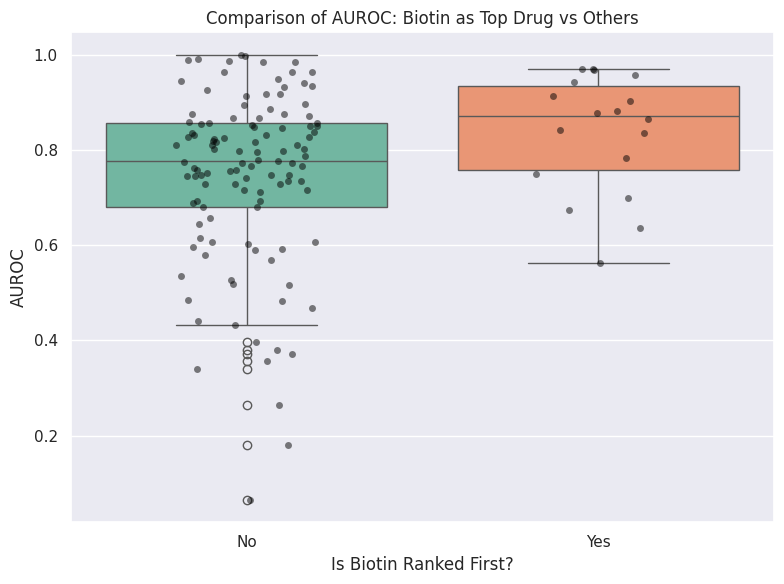

In [ ]:
# Tag each row based on whether Biotin is ranked 1st
df['Biotin First'] = df['Ranked List'].apply(lambda x: x[0] == 'Biotin')
#True if the first drug in the ranked list is 'Biotin'.
#False otherwise.

# Plot AUROC distributions

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Biotin First', y='AUROC', palette='Set2')
sns.stripplot(data=df, x='Biotin First', y='AUROC', color='black', alpha=0.5, jitter=0.2)

plt.title("Comparison of AUROC: Biotin as Top Drug vs Others")
plt.xlabel("Is Biotin Ranked First?")
plt.ylabel("AUROC")
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()


Same thing with accuracy

/tmp/ipython-input-47-65680569.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




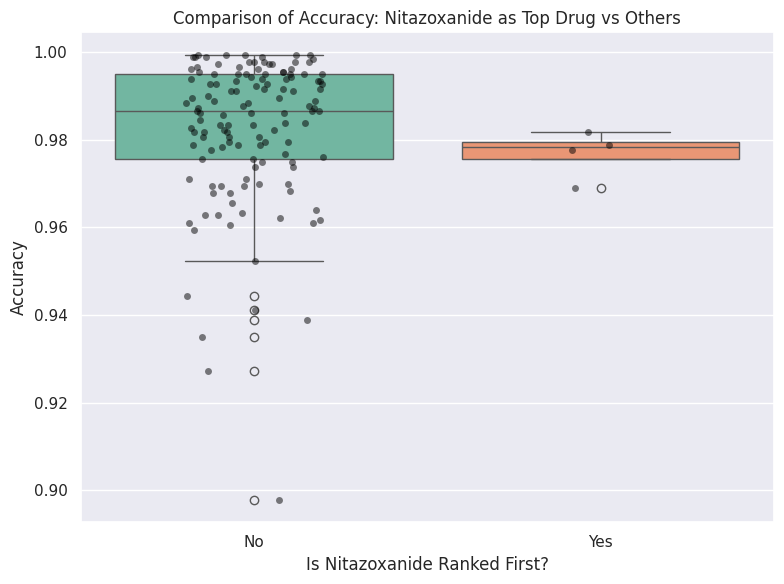

In [ ]:
# Tag each row based on whether Nitazoxanide is ranked 1st
df['Nitazoxanide First'] = df['Ranked List'].apply(lambda x: x[0] == 'Nitazoxanide')

# Plot Accuracy  distributions

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Nitazoxanide First', y='Accuracy', palette='Set2')
sns.stripplot(data=df, x='Nitazoxanide First', y='Accuracy', color='black', alpha=0.5, jitter=0.2)

plt.title("Comparison of Accuracy: Nitazoxanide as Top Drug vs Others")
plt.xlabel("Is Nitazoxanide Ranked First?")
plt.ylabel("Accuracy")
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()


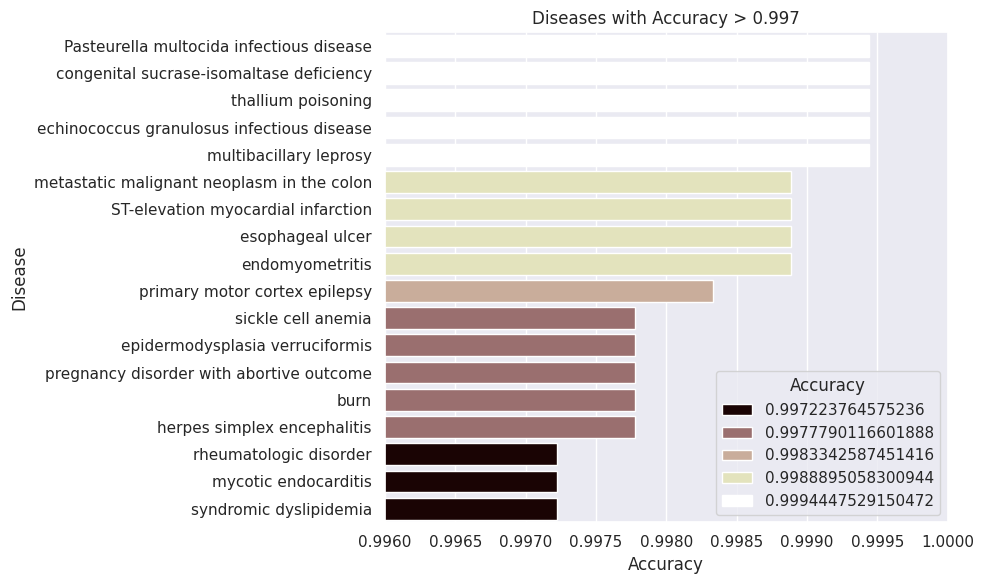

In [ ]:


high_accuracy_df = df[df['Accuracy'] > 0.997].copy()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=high_accuracy_df.sort_values(by='Accuracy', ascending=False),
    x='Accuracy',
    y='Name',
    palette='pink', hue='Accuracy'
)
plt.title("Diseases with Accuracy > 0.997")
plt.xlabel("Accuracy")
plt.xlim(0.996, 1)  # Set x-axis limits
plt.ylabel("Disease")
plt.tight_layout()
plt.show()


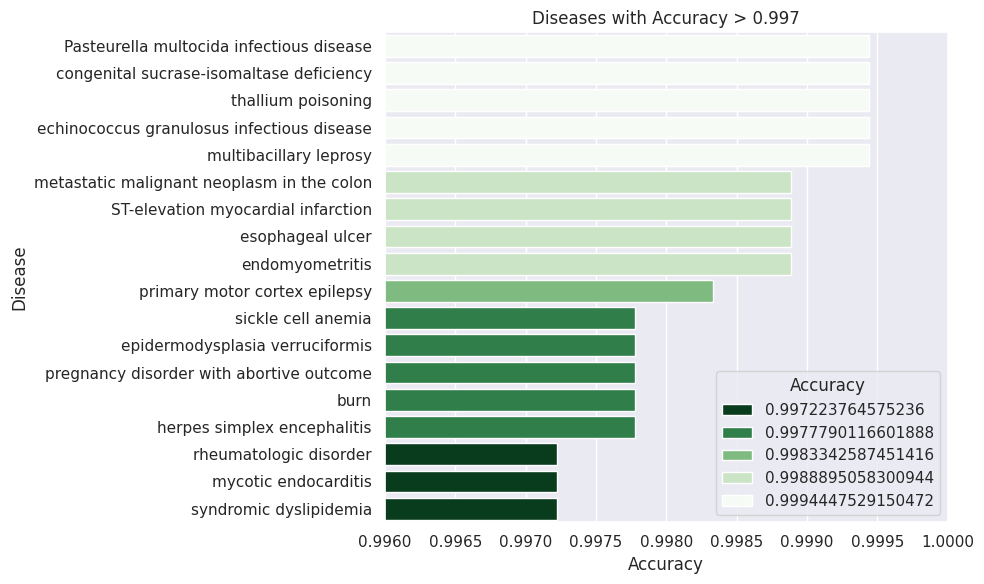

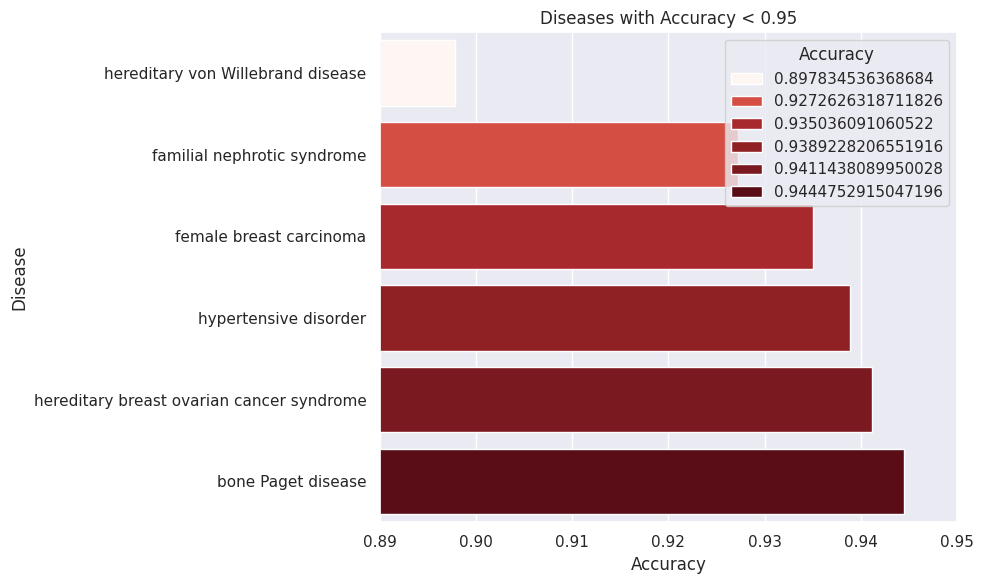

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter high and low accuracy
high_accuracy_df = df[df['Accuracy'] > 0.997].copy()
low_accuracy_df = df[df['Accuracy'] < 0.95].copy()  # adjust threshold as needed

# Plot HIGH accuracy
plt.figure(figsize=(10, 6))
sns.barplot(
    data=high_accuracy_df.sort_values(by='Accuracy', ascending=False),
    x='Accuracy',
    y='Name',
    palette='Greens_r',hue='Accuracy'
)
plt.title("Diseases with Accuracy > 0.997")
plt.xlabel("Accuracy")
plt.xlim(0.996, 1)
plt.ylabel("Disease")
plt.tight_layout()
plt.show()

# Plot LOW accuracy
plt.figure(figsize=(10, 6))
sns.barplot(
    data=low_accuracy_df.sort_values(by='Accuracy'),
    x='Accuracy',
    y='Name',
    palette='Reds',hue='Accuracy'
)
plt.title("Diseases with Accuracy < 0.95")
plt.xlabel("Accuracy")
plt.xlim(0.89, 0.95)
plt.ylabel("Disease")
plt.tight_layout()
plt.show()


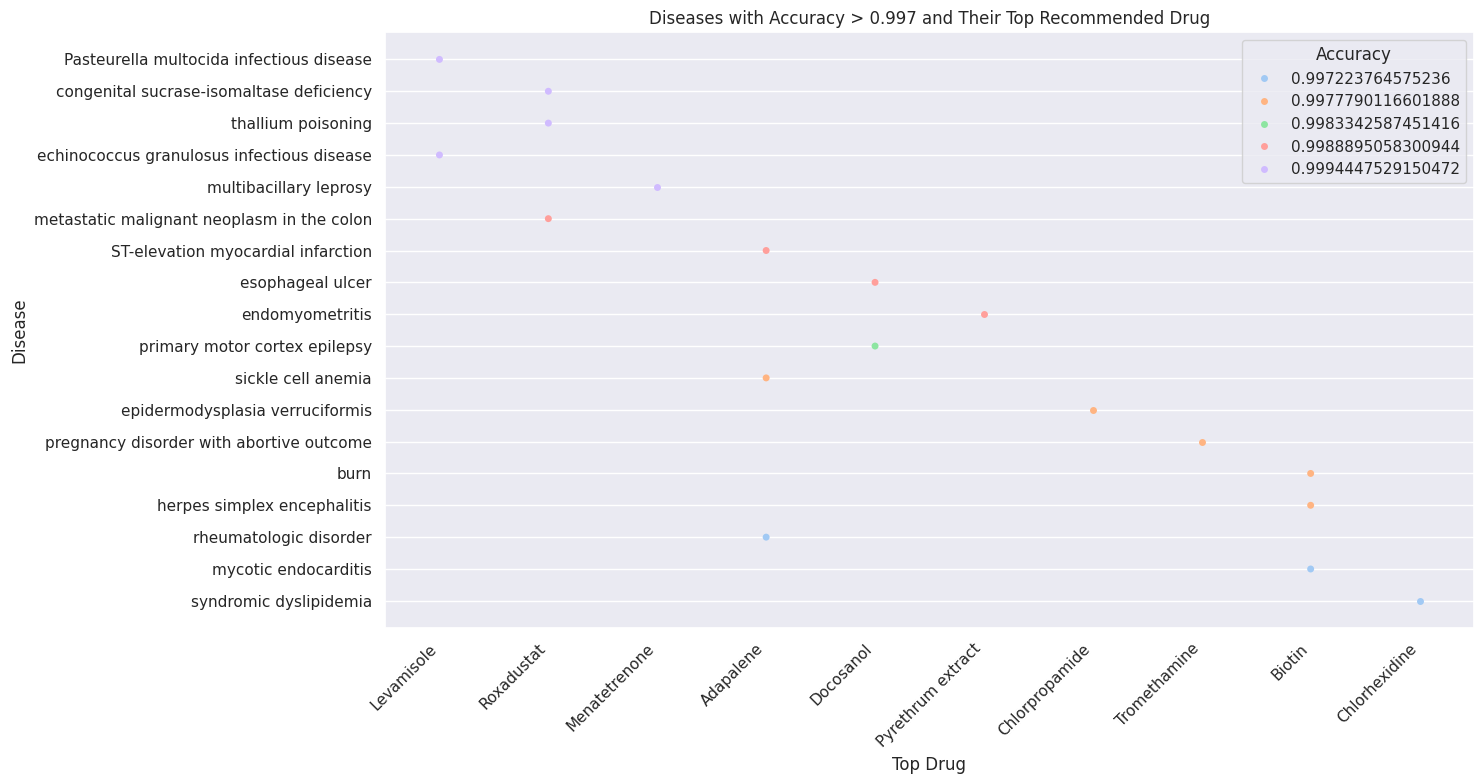

In [ ]:



high_accuracy_df = df[df['Accuracy'] > 0.997].copy()

# Extract the first drug in the ranked list as a new column
high_accuracy_df['Top Drug'] = high_accuracy_df['Ranked List'].apply(lambda x: x[0] if len(x) > 0 else None)

plt.figure(figsize=(15, 8))
sns.swarmplot(
    data=high_accuracy_df.sort_values(by='Accuracy', ascending=False),
    x='Top Drug',
    y='Name',
    palette='pastel', hue='Accuracy'
)

plt.title("Diseases with Accuracy > 0.997 and Their Top Recommended Drug")
plt.xlabel("Top Drug")
plt.ylabel("Disease")
plt.xticks(rotation=45, ha='right')  # Rotate x labels for readability
plt.tight_layout()
plt.show()


Same thing but with px to make it interactive

In [ ]:
 #here the x axis is the accuracy and y axis the drugs
import plotly.express as px

# Filter high accuracy diseases
high_auroc_df = df[df['Accuracy'] > 0.996].copy()

# Add a column for the first proposed drug
high_auroc_df['Top Drug'] = high_auroc_df['Ranked List'].apply(lambda x: x[0] if len(x) > 0 else None)

# Create interactive bar plot
fig = px.bar(
    high_auroc_df.sort_values(by='Accuracy', ascending=False),
    x='Accuracy',
    y='Name',
    orientation='h',  # horizontal bars
    color='Top Drug',
    hover_data={'Top Drug': True, 'Accuracy': ':.4f', 'Name': False},  # Show top drug and formatted accuracy on hover
    color_continuous_scale='pinkyl'
)

fig.update_layout(
    title="Diseases with Accuracy > 0.996",
    xaxis=dict(range=[0.996, 1], title='Accuracy'),
    yaxis_title='Disease',
    height=600
)

fig.show()


same thing but instead of bar plot, scatter plot ( to visualize which one is better )

In [ ]:
import plotly.express as px

# Filter high accuracy diseases
high_auroc_df = df[df['Accuracy'] > 0.996].copy()

# Add a column for the first proposed drug
high_auroc_df['Top Drug'] = high_auroc_df['Ranked List'].apply(lambda x: x[0] if len(x) > 0 else None)

# Create interactive bar plot
fig = px.scatter(
    high_auroc_df.sort_values(by='Accuracy', ascending=False),
    x='Accuracy',
    y='Name',
    color='Top Drug', #colors associated to the 1rst drug proposed
    hover_data={'Top Drug': True, 'Accuracy': ':.4f', 'Name': False},  # Show top drug and formatted accuracy on hover
    #color_continuous_scale='pinkyl'
)

fig.update_layout(
    title="Diseases with Accuracy > 0.997",
    xaxis=dict(range=[0.996, 1], title='Accuracy'),
    yaxis_title='Disease',
    height=600
)

fig.show()

In [ ]:
#trying to see the link between the accuracy , the specifity and the auroc
df['Top Drug'] = df['Ranked List'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)

fig = px.scatter(
    df,
    x='AUROC',
    y='Accuracy',
    color='Specificity', #points are colored with specificity
    size='Accuracy',
    hover_data=['Name', 'Top Drug'] # the hover data is associated to the disease and the first proposed durg
)
fig.show()
